In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
history = pd.read_hdf('./regelum_data/outputs/2024-04-15/18-23-30/0/.callbacks/HistoricalDataCallback/observations_actions_it_00020_ep_00008.h5')  

In [43]:
policy = pd.read_hdf('./regelum_data/outputs/2024-04-15/18-23-30/0/.callbacks/ObjectiveSaver/C. Policy objective. It 00020.h5')  

In [44]:
critic = pd.read_hdf('./regelum_data/outputs/2024-04-15/18-23-30/0/.callbacks/ObjectiveSaver/B. Critic objective. It 00020.h5')  

In [45]:
policy

,epoch_idx,objective
0,0,-24.368004


In [46]:
critic

,epoch_idx,objective
0,0,4325332.0
1,1,4324163.5
2,2,4323029.5
3,3,4321930.5
4,4,4320868.0
5,5,4319841.5
6,6,4318851.0
7,7,4317898.0
8,8,4316981.0
9,9,4316102.0


In [47]:
history

,time,current_value,episode_id,iteration_id,running_objective_portfolio,running_objective_market,delta_volume_0,delta_volume_1,delta_volume_2,drift_0,...,current_volume_2,prev_volume_0,prev_volume_1,prev_volume_2,current_price_0 [USD],current_price_1 [USD],current_price_2 [USD],prev_price_0 [USD],prev_price_1 [USD],prev_price_2 [USD]
0,0.00,0.000095,8,20,0.001905,0.000000,-0.017197,0.009116,0.027131,0.006319,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.05,0.000617,8,20,0.010806,0.000000,0.076432,0.022473,0.009151,0.040033,...,1.001357,1.000000,1.000000,1.000000,1.089777,1.010972,1.065655,1.000000,1.000000,1.000000
2,0.10,-0.093632,8,20,-2.020282,2.009970,-0.125802,-0.005858,0.028535,0.015545,...,1.001814,0.999140,1.000456,1.001357,1.131014,1.296573,0.902231,1.089777,1.010972,1.065655
3,0.15,217.390463,8,20,4826.274257,-4826.265434,-0.013050,-0.026693,0.127974,-0.063560,...,1.003241,1.002962,1.001579,1.001814,1.081349,1.266520,0.785235,1.131014,1.296573,0.902231
4,0.20,217.426966,8,20,0.838620,-0.842520,-0.063767,-0.035531,0.060303,-0.065733,...,1.009640,0.996672,1.001287,1.003241,0.887853,1.161637,0.820778,1.081349,1.266520,0.785235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,6.85,202.226753,8,20,258.699151,-258.710226,-0.091236,-0.013326,-0.006184,0.112941,...,1.130517,0.798950,0.843847,1.129331,0.035562,0.538351,0.528718,0.043775,0.680557,0.532910
138,6.90,202.220115,8,20,-15.855730,15.859799,0.026145,-0.002143,0.016688,-0.056937,...,1.130208,0.791798,0.838238,1.130517,0.038301,0.441136,0.585416,0.035562,0.538351,0.528718
139,6.95,202.218407,8,20,-4.223213,4.220854,-0.046032,-0.002496,0.024931,-0.010816,...,1.131043,0.787237,0.837572,1.130208,0.043394,0.440185,0.608853,0.038301,0.441136,0.585416
140,7.00,202.272873,8,20,139.434721,-139.435179,-0.053918,0.021646,0.027694,-0.005315,...,1.132289,0.788544,0.837465,1.131043,0.041056,0.366745,0.566065,0.043394,0.440185,0.608853


In [48]:
history[['cash share', 'share_0', 'share_1', 'share_2']]

,cash share,share_0,share_1,share_2
0,0.250000,0.250000,0.250000,0.250000
1,0.239785,0.261337,0.242758,0.256120
2,0.229383,0.261972,0.299905,0.208740
3,0.241814,0.260759,0.306826,0.190601
4,0.257481,0.228423,0.300041,0.214054
...,...,...,...,...
137,0.524103,0.012441,0.199375,0.264082
138,0.527947,0.013412,0.164345,0.294296
139,0.520842,0.015022,0.161830,0.302307
140,0.547440,0.014902,0.141767,0.295892


In [50]:
history[['cash [USD]', 'current_volume_0', 'current_volume_1', 'current_volume_2', 'prev_volume_0', 'prev_volume_1', 'prev_volume_2']]

,cash [USD],current_volume_0,current_volume_1,current_volume_2,prev_volume_0,prev_volume_1,prev_volume_2
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999045,0.999140,1.000456,1.001357,1.000000,1.000000,1.000000
2,0.993251,1.002962,1.001579,1.001814,0.999140,1.000456,1.001357
3,0.999449,0.996672,1.001287,1.003241,1.002962,1.001579,1.001814
4,0.996813,0.996019,0.999952,1.009640,0.996672,1.001287,1.003241
...,...,...,...,...,...,...,...
137,1.186257,0.791798,0.838238,1.130517,0.798950,0.843847,1.129331
138,1.186940,0.787237,0.837572,1.130208,0.791798,0.838238,1.130517
139,1.186448,0.788544,0.837465,1.131043,0.787237,0.837572,1.130208
140,1.185843,0.786242,0.837340,1.132289,0.788544,0.837465,1.131043


In [51]:
history[['cash [USD]', 'current_price_0 [USD]', 'current_price_1 [USD]', 'current_price_2 [USD]', 'prev_price_0 [USD]', 'prev_price_1 [USD]', 'prev_price_2 [USD]']]

,cash [USD],current_price_0 [USD],current_price_1 [USD],current_price_2 [USD],prev_price_0 [USD],prev_price_1 [USD],prev_price_2 [USD]
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999045,1.089777,1.010972,1.065655,1.000000,1.000000,1.000000
2,0.993251,1.131014,1.296573,0.902231,1.089777,1.010972,1.065655
3,0.999449,1.081349,1.266520,0.785235,1.131014,1.296573,0.902231
4,0.996813,0.887853,1.161637,0.820778,1.081349,1.266520,0.785235
...,...,...,...,...,...,...,...
137,1.186257,0.035562,0.538351,0.528718,0.043775,0.680557,0.532910
138,1.186940,0.038301,0.441136,0.585416,0.035562,0.538351,0.528718
139,1.186448,0.043394,0.440185,0.608853,0.038301,0.441136,0.585416
140,1.185843,0.041056,0.366745,0.566065,0.043394,0.440185,0.608853


In [41]:
history[['first_momentum', 'second_momontum']]

,first_momentum,second_momontum
0,0.000000,0.000000
1,0.000000,0.000000
2,0.053002,0.002957
3,0.053482,0.002868
4,-0.055169,0.003665
...,...,...
137,0.027613,0.000857
138,-0.103687,0.011663
139,-0.019182,0.000789
140,0.026091,0.000810


In [10]:
history.columns

Index(['time', 'current_value', 'episode_id', 'iteration_id',
       'running_objective_portfolio', 'running_objective_market',
       'delta_volume_0', 'delta_volume_1', 'delta_volume_2', 'drift_0',
       'drift_1', 'drift_2', 'volatility_0', 'volatility_1', 'volatility_2',
       'corr_0_1', 'corr_0_2', 'corr_1_2', 'cash share', 'share_0', 'share_1',
       'share_2', 'returns_0', 'returns_1', 'returns_2', 'cash [USD]',
       'first_momentum', 'second_momontum', 'current_volume_0',
       'current_volume_1', 'current_volume_2', 'prev_volume_0',
       'prev_volume_1', 'prev_volume_2', 'current_price_0 [USD]',
       'current_price_1 [USD]', 'current_price_2 [USD]', 'prev_price_0 [USD]',
       'prev_price_1 [USD]', 'prev_price_2 [USD]'],
      dtype='object')

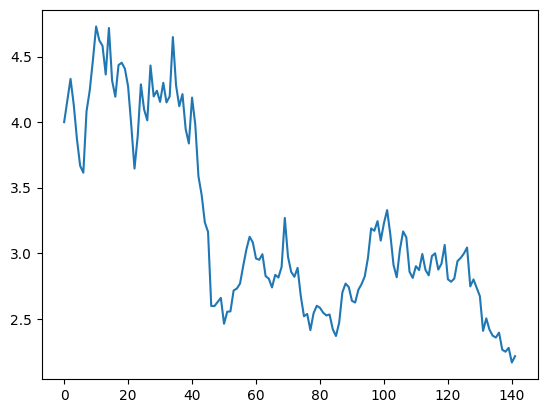

In [42]:
plt.plot(history['current_price_0 [USD]']*history['current_volume_0'] +
         history['current_price_1 [USD]']*history['current_volume_1']+
         history['current_price_2 [USD]']*history['current_volume_2']+
         history['cash [USD]'])